In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
df=pd.read_excel("Book2.xlsx")

In [5]:
df.tail()

,date,Corrected sales
31,2021-08-01,154350.0
32,2021-09-01,145870.0
33,2021-10-01,156870.0
34,2021-11-01,148970.0
35,2021-12-01,143240.0


In [6]:
from datetime import datetime
from datetime import timedelta

In [7]:

df.set_index("date", inplace=True)

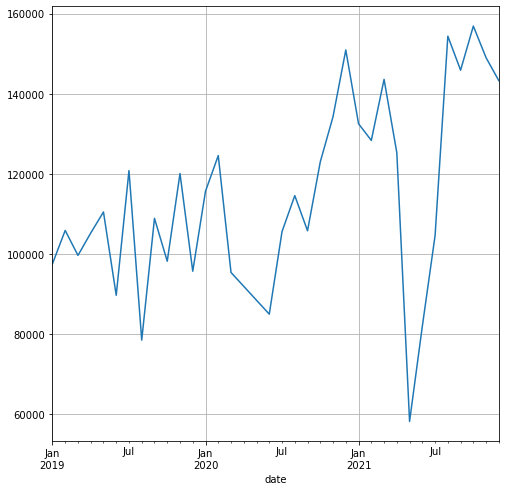

In [8]:
plt.figure(figsize=(8,8))
df["Corrected sales"].plot(grid=True)
plt.show()

In [9]:
import statsmodels
from statsmodels.tsa.stattools import adfuller

In [10]:
adfuller(df["Corrected sales"])

(-2.970061950017129,
 0.03778640878252715,
 0,
 35,
 {'1%': -3.6327426647230316,
  '5%': -2.9485102040816327,
  '10%': -2.6130173469387756},
 570.841496747895)

In [11]:
df['log']=np.log(df["Corrected sales"])

In [12]:
adfuller(df["log"])

(-3.335826803710855,
 0.013351022356416305,
 0,
 35,
 {'1%': -3.6327426647230316,
  '5%': -2.9485102040816327,
  '10%': -2.6130173469387756},
 -5.834214740578709)

In [13]:
df1=df.copy()

In [14]:
df1['MA1']=df1["Corrected sales"].rolling(12).mean()
df1["MA2"]=df1['Corrected sales'].rolling(12).std()

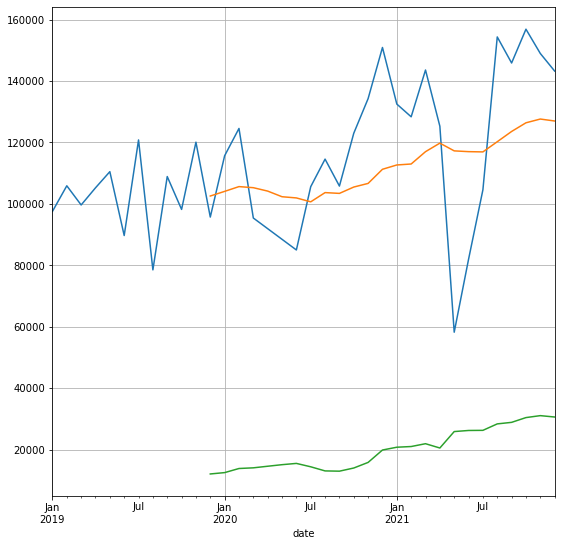

In [17]:
plt.figure(figsize=(9,9))
df1["Corrected sales"].plot(grid=True)
df1["MA1"].plot(grid=True)
df1["MA2"].plot(grid=True)
plt.show()

In [18]:
df["1st difference"]=df["log"].diff()

In [21]:
df1=df.dropna(axis=0)

In [22]:
df1.shape

(35, 3)

In [23]:
adfuller(df1["1st difference"])

(-7.666664895018599,
 1.6343055042493116e-11,
 0,
 34,
 {'1%': -3.639224104416853,
  '5%': -2.9512301791166293,
  '10%': -2.614446989619377},
 -0.03565931921580301)

<AxesSubplot:xlabel='date'>

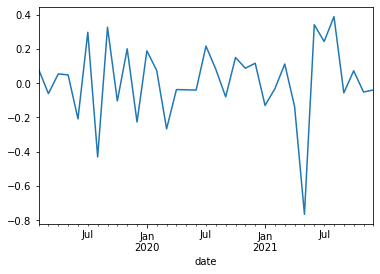

In [24]:
df1["1st difference"].plot()

In [25]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

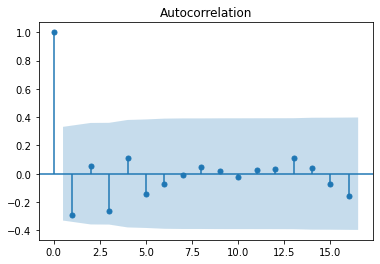

In [26]:
plot_acf(df1["1st difference"])
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


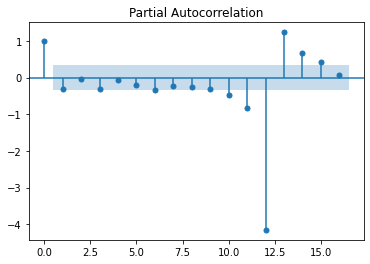

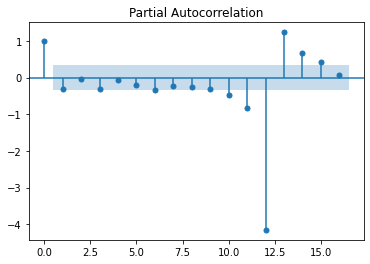

In [27]:
plot_pacf(df1["1st difference"])

In [28]:
from statsmodels.tsa.arima_model import ARMA
import itertools

In [29]:
p=q=range(0,8)
pq=list(itertools.product(p,q))
list1=[]
list2=[]
for order in pq:
    try:
        model=ARMA(df1["1st difference"],order=order)
        model_fit=model.fit()
        list1.append(order)
        list2.append(model_fit.aic)
    except: 
        continue

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

In [30]:
dlist1=pd.DataFrame(list1)
dlist1.rename(columns={0:"p",1:"q"},inplace=True)
dlist2=pd.DataFrame(list2)
dlist2.rename(columns={0:"Aic"},inplace=True)
table=pd.concat([dlist1,dlist2],axis=1)

In [31]:
table

,p,q,Aic
0,0,0,-1.791971
1,0,1,-3.519242
2,0,2,-6.497577
3,0,3,-7.479292
4,0,4,-6.052526
5,0,5,NaN
6,0,6,NaN
7,0,7,NaN
8,1,0,-2.878766
9,1,1,-7.920551


In [32]:
table["Aic"].min()

-9.560163966999568

In [33]:
data=table.query("Aic==Aic.min()")

In [34]:
data

,p,q,Aic
22,3,2,-9.560164


In [35]:
model1=ARMA(df1["1st difference"],order=(3,2))

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

In [36]:
model1_fit=model1.fit()

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [37]:
pred=model1_fit.predict(start='2019-02-01',end='2021-12-01')

<AxesSubplot:xlabel='date'>

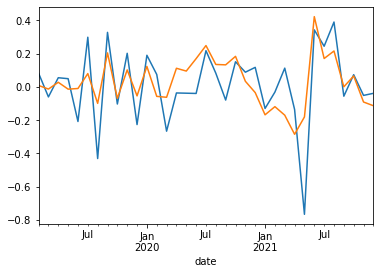

In [38]:
df1["1st difference"].plot()
pred.plot()

In [39]:
pr=model1_fit.predict()

In [40]:
pr1=pr.to_frame()

In [41]:
pr2= pr1[0]+df1["log"].shift(1)

In [42]:
pr2

2019-02-01          NaN
2019-03-01    11.556592
2019-04-01    11.536485
2019-05-01    11.549846
2019-06-01    11.602443
2019-07-01    11.483625
2019-08-01    11.602467
2019-09-01    11.474724
2019-10-01    11.528729
2019-11-01    11.596322
2019-12-01    11.641442
2020-01-01    11.591606
2020-02-01    11.600995
2020-03-01    11.669531
2020-04-01    11.577146
2020-05-01    11.523363
2020-06-01    11.559711
2020-07-01    11.598221
2020-08-01    11.701638
2020-09-01    11.780866
2020-10-01    11.752274
2020-11-01    11.753225
2020-12-01    11.772846
2021-01-01    11.756233
2021-02-01    11.675039
2021-03-01    11.591989
2021-04-01    11.589213
2021-05-01    11.557198
2021-06-01    11.393684
2021-07-01    11.484033
2021-08-01    11.772920
2021-09-01    11.947036
2021-10-01    11.955520
2021-11-01    11.871851
2021-12-01    11.797772
Freq: MS, dtype: float64

In [43]:
pr3=np.exp(pr2)

In [44]:
pr3

2019-02-01              NaN
2019-03-01    104463.414203
2019-04-01    102383.924800
2019-05-01    103761.030965
2019-06-01    109364.702719
2019-07-01     97112.477508
2019-08-01    109367.260849
2019-09-01     96251.934627
2019-10-01    101592.888406
2019-11-01    108697.290027
2019-12-01    113714.044107
2020-01-01    108185.876212
2020-02-01    109206.415177
2020-03-01    116953.398057
2020-04-01    106632.723746
2020-05-01    101049.177828
2020-06-01    104789.708695
2020-07-01    108903.872677
2020-08-01    120769.417253
2020-09-01    130726.981779
2020-10-01    127042.098657
2020-11-01    127163.058674
2020-12-01    129682.644688
2021-01-01    127546.088538
2021-02-01    117599.374081
2021-03-01    108227.293326
2021-04-01    107927.245497
2021-05-01    104526.702196
2021-06-01     88759.303887
2021-07-01     97152.125251
2021-08-01    129692.310955
2021-09-01    154358.955235
2021-10-01    155674.142568
2021-11-01    143178.993449
2021-12-01    132955.856317
Freq: MS, dtype: flo

In [45]:
from sklearn.metrics import mean_squared_error

In [46]:
MSE=mean_squared_error(df1["Corrected sales"][1:],pr3[1:])

In [47]:
np.sqrt(MSE)

17209.738109453872

In [48]:
df1["Corrected sales"].mean()

114062.85685714286

In [49]:
forecast=model1_fit.predict(start='2022-01-01',end='2022-12-01')

In [50]:
forecast

2022-01-01   -0.158890
2022-02-01   -0.064007
2022-03-01   -0.023383
2022-04-01    0.037533
2022-05-01    0.065276
2022-06-01    0.071314
2022-07-01    0.054688
2022-08-01    0.028256
2022-09-01    0.002060
2022-10-01   -0.015474
2022-11-01   -0.021203
2022-12-01   -0.016315
Freq: MS, dtype: float64

In [51]:
f1=forecast.to_frame()


In [52]:
f1

,0
2022-01-01,-0.158890
2022-02-01,-0.064007
2022-03-01,-0.023383
2022-04-01,0.037533
2022-05-01,0.065276
2022-06-01,0.071314
2022-07-01,0.054688
2022-08-01,0.028256
2022-09-01,0.002060
2022-10-01,-0.015474


In [53]:
f1.rename(columns={0:"1 diff"},inplace=True)


In [54]:
f1

,1 diff
2022-01-01,-0.158890
2022-02-01,-0.064007
2022-03-01,-0.023383
2022-04-01,0.037533
2022-05-01,0.065276
2022-06-01,0.071314
2022-07-01,0.054688
2022-08-01,0.028256
2022-09-01,0.002060
2022-10-01,-0.015474


In [55]:
p=df['log'][-1]


In [56]:
p

11.872276824112369

In [57]:
f1["log"]=np.NaN
f1["log"][0]=p

In [58]:
f1

,1 diff,log
2022-01-01,-0.158890,11.872277
2022-02-01,-0.064007,NaN
2022-03-01,-0.023383,NaN
2022-04-01,0.037533,NaN
2022-05-01,0.065276,NaN
2022-06-01,0.071314,NaN
2022-07-01,0.054688,NaN
2022-08-01,0.028256,NaN
2022-09-01,0.002060,NaN
2022-10-01,-0.015474,NaN


In [59]:
for i in range(1,12):
    f1["log"][i]= f1["log"][i-1]+f1["1 diff"][i]

In [60]:
f1["forecasted scaled back values"]=np.exp(f1["log"])

In [61]:
f1

,1 diff,log,forecasted scaled back values
2022-01-01,-0.158890,11.872277,143240.000000
2022-02-01,-0.064007,11.808270,134358.959279
2022-03-01,-0.023383,11.784888,131253.742546
2022-04-01,0.037533,11.822421,136273.731755
2022-05-01,0.065276,11.887697,145465.941600
2022-06-01,0.071314,11.959011,156218.532370
2022-07-01,0.054688,12.013700,164999.799125
2022-08-01,0.028256,12.041955,169728.473926
2022-09-01,0.002060,12.044016,170078.544876
2022-10-01,-0.015474,12.028541,167466.950498


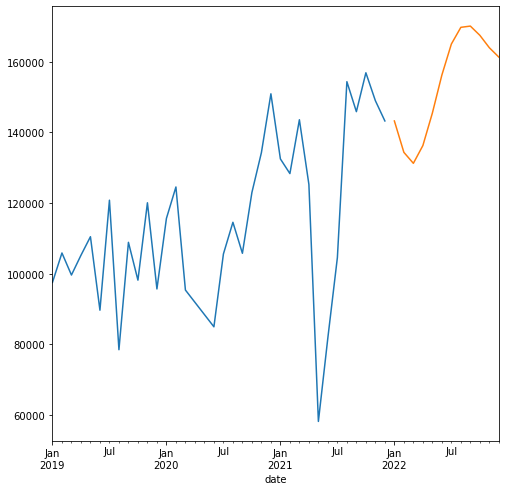

In [62]:
plt.figure(figsize=(8,8))
df["Corrected sales"].plot()
f1["forecasted scaled back values"].plot()
plt.show()